# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [1]:
!pip install networkx==2.3

     |████████████████████████████████| 1.7 MB 33.3 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=ee56c6939ce9609a806a671079db60d606657867a8f83ba3b07803a42ac3fba3
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.2
    Uninstalling networkx-2.6.2:
      Successfully uninstalled networkx-2.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [10]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow
import sys
if 'google.colab' in sys.modules:
  %pip install -q stellargraph[demos]==1.2.1
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

     |████████████████████████████████| 435 kB 36.6 MB/s 
     |████████████████████████████████| 379 kB 41.5 MB/s 
     |████████████████████████████████| 45 kB 3.9 MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movie_actor_network.csv", index_col=False, names=['movie','actor'])

In [30]:
edges = [tuple(x) for x in data.values.tolist()]
print(edges)

[('m1', 'a1'), ('m2', 'a1'), ('m2', 'a2'), ('m3', 'a1'), ('m3', 'a3'), ('m3', 'a4'), ('m3', 'a5'), ('m3', 'a6'), ('m3', 'a7'), ('m4', 'a1'), ('m4', 'a10'), ('m4', 'a8'), ('m4', 'a9'), ('m5', 'a1'), ('m5', 'a11'), ('m5', 'a12'), ('m5', 'a13'), ('m5', 'a14'), ('m5', 'a15'), ('m5', 'a16'), ('m5', 'a17'), ('m5', 'a18'), ('m5', 'a19'), ('m7', 'a21'), ('m7', 'a22'), ('m8', 'a22'), ('m9', 'a22'), ('m9', 'a23'), ('m10', 'a22'), ('m10', 'a24'), ('m10', 'a25'), ('m11', 'a22'), ('m11', 'a26'), ('m11', 'a27'), ('m11', 'a28'), ('m11', 'a29'), ('m24', 'a47'), ('m25', 'a47'), ('m25', 'a48'), ('m25', 'a49'), ('m25', 'a50'), ('m25', 'a51'), ('m25', 'a52'), ('m25', 'a53'), ('m25', 'a54'), ('m25', 'a55'), ('m25', 'a56'), ('m25', 'a57'), ('m25', 'a58'), ('m25', 'a59'), ('m25', 'a60'), ('m25', 'a61'), ('m25', 'a62'), ('m25', 'a63'), ('m25', 'a64'), ('m25', 'a65'), ('m25', 'a66'), ('m25', 'a67'), ('m25', 'a68'), ('m25', 'a69'), ('m25', 'a70'), ('m26', 'a47'), ('m26', 'a71'), ('m26', 'a72'), ('m26', 'a73'), 

In [11]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [12]:
A = list(nx.connected_component_subgraphs(B))[0]

In [13]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


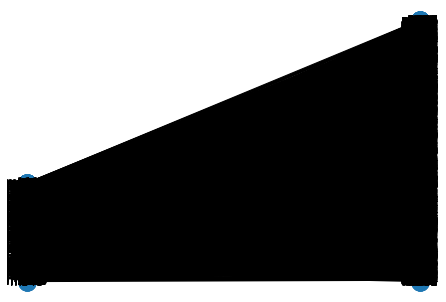

In [14]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [15]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [16]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [17]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [18]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [19]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

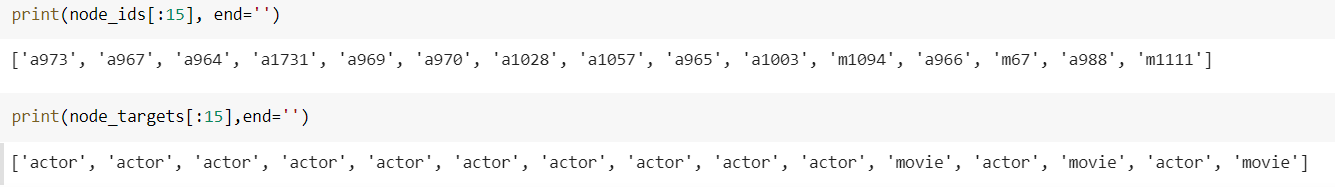

In [20]:
'''#https://stackoverflow.com/questions/66636406/apply-clustering-algorithm-to-group-similar-actors
#https://medium.com/@saivenkat_/unsupervised-learning-using-a-simple-graph-based-dataset-fda920d9a0c7
def data_split(node_ids,node_targets,node_embeddings):
    #In this function, we will split the node embeddings into actor_embeddings , movie_embeddings
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    actor_embedding = [actor_embeddings.append(x) for i,x in enumerate(node_embeddings) if node_targets[i]=='actor']
    actor_node = [actor_nodes.append(x) for i,x in enumerate(node_ids) if node_targets[i]=='actor']
    movie_embedding = [movie_embeddings.append(x) for i,x in enumerate(node_embeddings) if node_targets[i]=='movies']
    movie_node = [movie_nodes.append(x) for i,x in enumerate(node_ids) if node_targets[i]=='movie']

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings
    '''
def data_split(node_ids,node_targets,node_embeddings):
  
  actor_indices,movie_indices=[],[]
  actor_dimensions,movie_dimensions=[],[]
  for i in range(len(node_targets)):
    if node_targets[i]=='actor':
     actor_indices.append(i)
    else:
      movie_indices.append(i)
    actor_dimensions=np.array(node_embeddings[actor_indices])
    movie_dimensions=np.array(node_embeddings[movie_indices])
  # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
  # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
  # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
  return actor_indices,movie_indices,actor_dimensions,movie_dimensions



In [21]:
actor_nodes,movie_nodes,actor_data,movie_data=data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [22]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [23]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [24]:
'''def cost1(graph,number_of_clusters):
    
   nodes_in_largest_connected_component=len(max(nx.connected_components(graph),key=len))
   actors_1=[]
   for i in graph.nodes():
     if 'a' in i:
       actors_1.append(i)
   list_n=[]
   for j in actors_1:
     list_n.append(len(graph[j]))

   #cost1=1/number_of_clusters*(max(list_n)/graph.number_of_nodes())
   cost1=nodes_in_largest_connected/number_of_clusters
   return cost1      '''

def cost1(graph,number_of_clusters):
 num= max([len(x) for x in list(nx.connected_components(graph))])
 den=graph.number_of_nodes()
 total=num/den
 return total/number_of_clusters
    

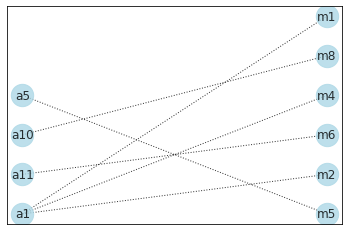

In [25]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [26]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [27]:
def cost2(graph,number_of_clusters):
  d=graph.degree()
  nodes=list(graph.nodes())
  unique=[]
  for i in nodes:
    if i not in unique:
     unique.append(i)
  sum=0
  for i in d:
    if 'a' in i[0]:
     sum+=i[1]
  mov=0
  for i in unique:
    if 'm' in i:
     mov+=1
  cost2=sum/mov
  return cost2/number_of_clusters

<font color='cyan'>Grader function - 4</font>

In [28]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [29]:
from sklearn.cluster import KMeans
cluster_list=[3,5,10,30,50,100,200,500]
Cost=[]
for cluster in cluster_list:
  algo=KMeans(n_clusters=cluster)
  algo.fit(actor_data)
  label=algo.labels_
  dic=dict(zip(actor_nodes,label))
  cost_1=0
  cost_2=0
  for i in label:
    ac_node = [k for k,v in dic.items() if v == i]
    G1=nx.Graph()
    for n in ac_node:
      sub_graph1 = nx.ego_graph(A,node_ids[n])
      G1.add_nodes_from(sub_graph1.nodes)
      G1.add_edges_from(sub_graph1.edges())
    cost_1=+cost1(G1,cluster)
    cost_2=+cost2(G1,cluster)
  print(cost_1*cost_2)
  Cost.append(cost_1*cost_2)

0.46645844423208893
0.1621400072542619
0.0215903289453402
0.00013174822239978045
5.1352907311456536e-05
1.6305331497147353e-05
3.4331518451300663e-06
1.3647058823529413e-07


<font color='blue'>Displaying similar actor clusters</font>

In [31]:
best_cluster=cluster_list[Cost.index(max(Cost))]

In [32]:
algo=KMeans(n_clusters=best_cluster)
algo.fit(actor_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
from sklearn.manifold import TSNE
transform = TSNE #PCA
trans = transform(n_components=2)
actor_2d = trans.fit_transform(actor_data)


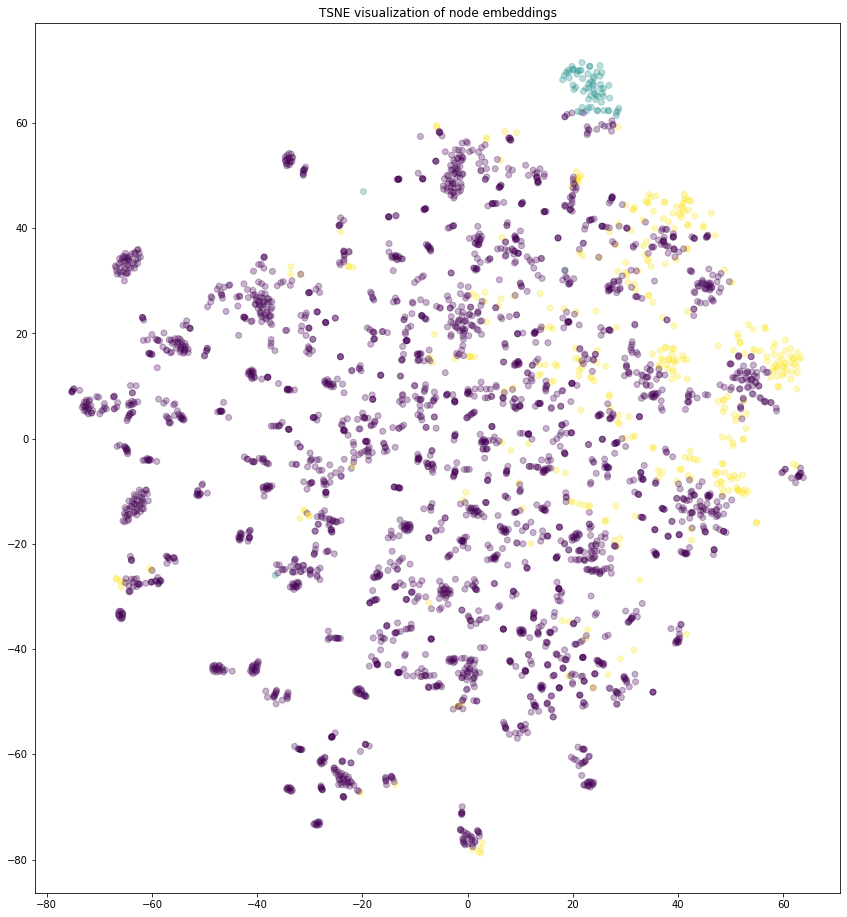

In [34]:
import numpy as np
# draw the points
y_kmeans = algo.predict(actor_data)
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(actor_2d[:,0],
           actor_2d[:,1],
           c=y_kmeans, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))
plt.show()

<font color='blue'>Grouping similar movies</font>

In [40]:
cluster_list=[3,5,10,30,50,100,200,500]
Cost_movies=[]
for cluster in cluster_list:
  algon=KMeans(n_clusters=cluster)
  algon.fit(movie_data)
  labeln=algon.labels_
  dic=dict(zip(movie_nodes,labeln))
  cost_1=0
  cost_2=0
  for i in labeln:
    ac_node = [k for k,v in dic.items() if v == i]
    G1=nx.Graph()
    for n in ac_node:
      sub_graph1 = nx.ego_graph(A,node_ids[n])
      G1.add_nodes_from(sub_graph1.nodes)
      G1.add_edges_from(sub_graph1.edges())
    cost_1=+cost1(G1,cluster)
    cost_2=+cost2(G1,cluster)
  print(cost_1*cost_2)
  Cost_movies.append(cost_1*cost_2)

0.707327617926264
0.2534311064919068
0.02072970755590843
0.0014859828969656472
0.0006344329831060581
6.76959826275787e-05
3.147193984124774e-05
2.592047128129602e-06


<font color='blue'>Displaying similar movie clusters</font>

In [41]:
best_clusterm=cluster_list[Cost_movies.index(max(Cost_movies))]

In [42]:
algom=KMeans(n_clusters=best_clusterm)
algom.fit(movie_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
from sklearn.manifold import TSNE
transform = TSNE #PCA
trans = transform(n_components=2)
movies_2d = trans.fit_transform(movie_data)

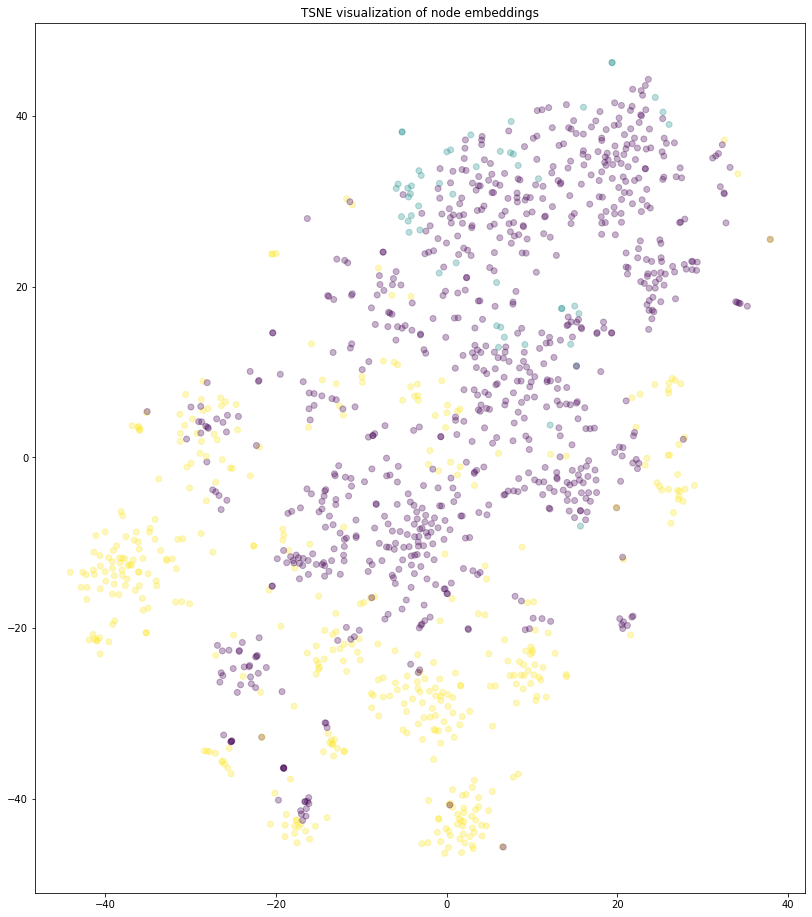

In [45]:
import numpy as np
# draw the points
y_kmeansn = algo.predict(movie_data)
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(movies_2d[:,0],
movies_2d[:,1],
c=y_kmeansn, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))
plt.show()